In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


### Establishing the coverage cutoffs

In [2]:
df_kir_ = pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/kir_four_random_counts.csv', 
                      index_col=0)

In [3]:
capture_kits = capture_kits[capture_kits.SHORT_ID.isin(df_kir_.index)]

In [4]:
capture_kits.head()

,ID,SHORT_ID,KIT
0,TCGA-02-0003-10A-01D-1490-08,TCGA-02-0003,Agilent Custom
1,TCGA-02-0033-10A-01D-1490-08,TCGA-02-0033,Agilent Custom
2,TCGA-02-0047-10A-01D-1490-08,TCGA-02-0047,Agilent Custom
3,TCGA-02-0055-10A-01D-1490-08,TCGA-02-0055,Agilent Custom
4,TCGA-02-2470-10A-01D-1494-08,TCGA-02-2470,Agilent Custom


In [5]:
agilent_samples = [x for x in capture_kits[capture_kits.KIT == 'Agilent Custom'].SHORT_ID if x in df_kir_.index]
non_agilent_samples = [x for x in df_kir_.index if x not in agilent_samples]

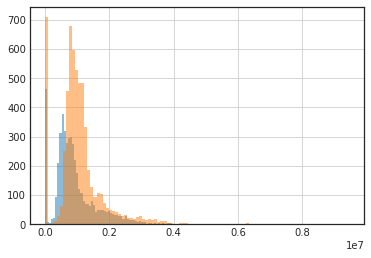

In [6]:
df_kir_.loc[non_agilent_samples, four_mers].sum(axis=1).hist(bins=100, alpha=0.5)
df_kir_.loc[agilent_samples, four_mers].sum(axis=1).hist(bins=100, alpha=0.5)

In [7]:
len(agilent_samples), len(df_kir_)

(5885, 10292)

In [8]:
df_kir_.loc[agilent_samples, four_mers].sum(axis=1).describe()

count    5.885000e+03
mean     1.069021e+06
std      7.351933e+05
min      9.300000e+01
25%      7.469920e+05
50%      9.648690e+05
75%      1.255116e+06
max      9.454636e+06
dtype: float64

## How do the distributions look when patients of different coverages are excluded?

In [9]:
random_genes = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/kmers/reference_genes/random_genes.100.txt').readlines()]
len(random_genes)

9936

In [10]:
# maybe split up into specific genes and take the average of those??? 

(0, 600000)

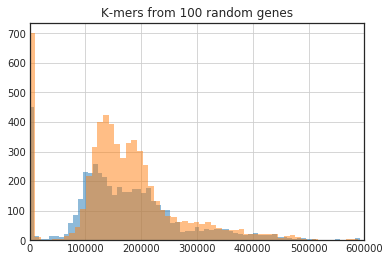

In [11]:
df_kir_.loc[non_agilent_samples, random_genes].sum(axis=1).hist(bins=100, alpha=0.5)
df_kir_.loc[agilent_samples, random_genes].sum(axis=1).hist(bins=100, alpha=0.5)
plt.title('K-mers from 100 random genes')
plt.xlim(0, 600000)

Subset patients to those with high enough coverage

In [12]:
# KIR k-mers
kir_kmers = []
for gene in kmers[30].keys():
    kir_kmers.extend(kmers[30][gene])

(0, 1200000)

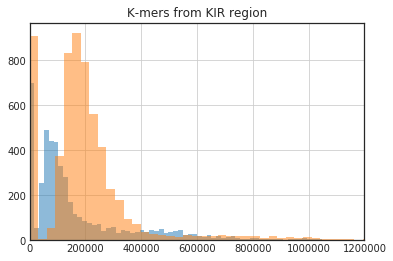

In [13]:
df_kir_.loc[non_agilent_samples, kir_kmers].sum(axis=1).hist(bins=100, alpha=0.5)
df_kir_.loc[agilent_samples, kir_kmers].sum(axis=1).hist(bins=100, alpha=0.5)
plt.title('K-mers from KIR region')
plt.xlim(0, 1200000)

In [14]:
df_kir_.loc[:, kir_kmers].sum(axis=1).describe()

count    1.029200e+04
mean     1.991951e+05
std      2.094411e+05
min      0.000000e+00
25%      7.818775e+04
50%      1.514415e+05
75%      2.407435e+05
max      3.062274e+06
dtype: float64

Concordance bewteen KIR region and random genes

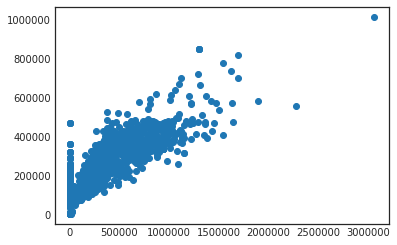

In [15]:
tmp = pd.merge(pd.DataFrame(df_kir_.loc[agilent_samples, kir_kmers].sum(axis=1)), 
         pd.DataFrame(df_kir_.loc[agilent_samples, random_genes].sum(axis=1)),
         left_index=True, right_index=True)
tmp.columns = ['KIR_kmers', 'Random_kmers']
plt.scatter(tmp.KIR_kmers, tmp.Random_kmers)

### Make a combined figure

In [16]:
# TSNE, (distribution of patients), two histograms

In [17]:
tsne_data = pd.read_csv('/cellar/users/ramarty/Data/kir/TCGA/data_frames/tsne.random_genes.csv',
                       index_col=0)

In [18]:
tsne_data = tsne_data.dropna()

In [19]:
tsne_data.head()

,tsne1,tsne2,sample,capture_kit,color
0,-30.719261,1.974082,TCGA-TM-A84O,Agilent Custom,"(0.86, 0.8169142857142857, 0.33999999999999997)"
1,-33.882670,4.028336,TCGA-BF-AAP2,Agilent Custom,"(0.86, 0.8169142857142857, 0.33999999999999997)"
2,18.597733,26.295706,TCGA-EJ-7794,Agilent Custom,"(0.86, 0.8169142857142857, 0.33999999999999997)"
3,36.442932,-24.683651,TCGA-CV-A45Q,Agilent Custom,"(0.86, 0.8169142857142857, 0.33999999999999997)"
4,27.918756,-49.079270,TCGA-DH-5140,Agilent Custom,"(0.86, 0.8169142857142857, 0.33999999999999997)"


In [20]:
pal = "Set2"

In [21]:
palette = sns.color_palette(pal, len(tsne_data['capture_kit'].unique()))
colors = {}
for i, capture_kit in enumerate(set(tsne_data.capture_kit)):
    colors[capture_kit] = palette[i]
tsne_data['color'] = tsne_data.capture_kit.map(colors)

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


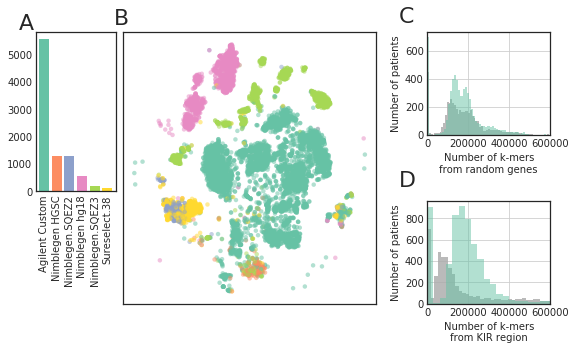

In [24]:
fig = plt.figure(figsize=(10, 5))
num_rows, num_columns = 5, 13

ax0 = plt.subplot2grid((num_rows, num_columns), (0, 0), rowspan=3, colspan=2)
tsne_data.capture_kit.value_counts().plot(kind ='bar', colors=sns.color_palette(pal, 6),
                                         width=0.8)
plt.text(-2, 5900, 'A', size= 22)

ax1 = plt.subplot2grid((num_rows, num_columns), (0, 2), rowspan=5, colspan=6)
plt.scatter(tsne_data.tsne1, tsne_data.tsne2, c=tsne_data.color, lw=0, alpha=0.5, s=20)
plt.xticks([])
plt.yticks([])
plt.text(-110, 95, 'B', size= 22)

ax2 = plt.subplot2grid((num_rows, num_columns), (0, 9), rowspan=2, colspan=3)
df_kir_.loc[non_agilent_samples, random_genes].sum(axis=1).hist(bins=100, alpha=0.8, 
                                                                color='darkgrey')
df_kir_.loc[agilent_samples, random_genes].sum(axis=1).hist(bins=100, alpha=0.5, 
                                                            color=palette[0])
plt.xlabel('Number of k-mers\nfrom random genes')
plt.ylabel('Number of patients')
plt.xlim(0, 600000)
plt.text(-140000, 800, 'C', size= 22)

ax3 = plt.subplot2grid((num_rows, num_columns), (3, 9), rowspan=2, colspan=3)
(df_kir_.loc[non_agilent_samples, kir_kmers].sum(axis=1)).hist(bins=100, alpha=0.8, 
                                                                     color='darkgrey')
(df_kir_.loc[agilent_samples, kir_kmers].sum(axis=1)).hist(bins=100, alpha=0.5,
                                                                 color=palette[0])
plt.xlabel('Number of k-mers\nfrom KIR region')
plt.ylabel('Number of patients')
plt.xlim(0, 600000)

plt.text(-140000, 1100, 'D', size= 22)
plt.savefig('/cellar/users/ramarty/Data/kir/manuscript_figures/figure_4.pdf', bbox_inches='tight')

### Output to dataframe

In [20]:
patients = list(df_kir_[(df_kir_.loc[:, random_genes].sum(axis=1) > 40000)&(df_kir_.loc[:, kir_kmers].sum(axis=1) > 20000)].index)

In [21]:
patients = [x for x in patients if x in agilent_samples]
print len(patients)

4717


In [22]:
df_kir_.loc[patients].to_csv('/cellar/users/ramarty/Data/kir/components/tcga/kir_four_random_counts.agilent.good_coverage.csv')

Do the same for read counts

In [23]:
df_kir_ = pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/kir_four_random_read_counts.csv', 
                      index_col=0)

In [24]:
df_kir_.loc[patients].to_csv('/cellar/users/ramarty/Data/kir/components/tcga/kir_four_random_read_counts.agilent.good_coverage.csv')